In [117]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import cm
import pylab 
import statsmodels.api as sm
import seaborn as sns
from sklearn.utils import resample
import scipy.stats as stats


In [4]:
df = pd.read_csv('delhi_aqi.csv', parse_dates = True)
df = df.dropna() # Drop the missing values

In [5]:
df

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
...,...,...,...,...,...,...,...,...,...
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


In [6]:
#Find the missing values from each column
print(df.isnull().sum())

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [8]:
df.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


In [9]:
df_no_time = df.iloc[:, 1:]  # Exclude the time column for plotting purposes

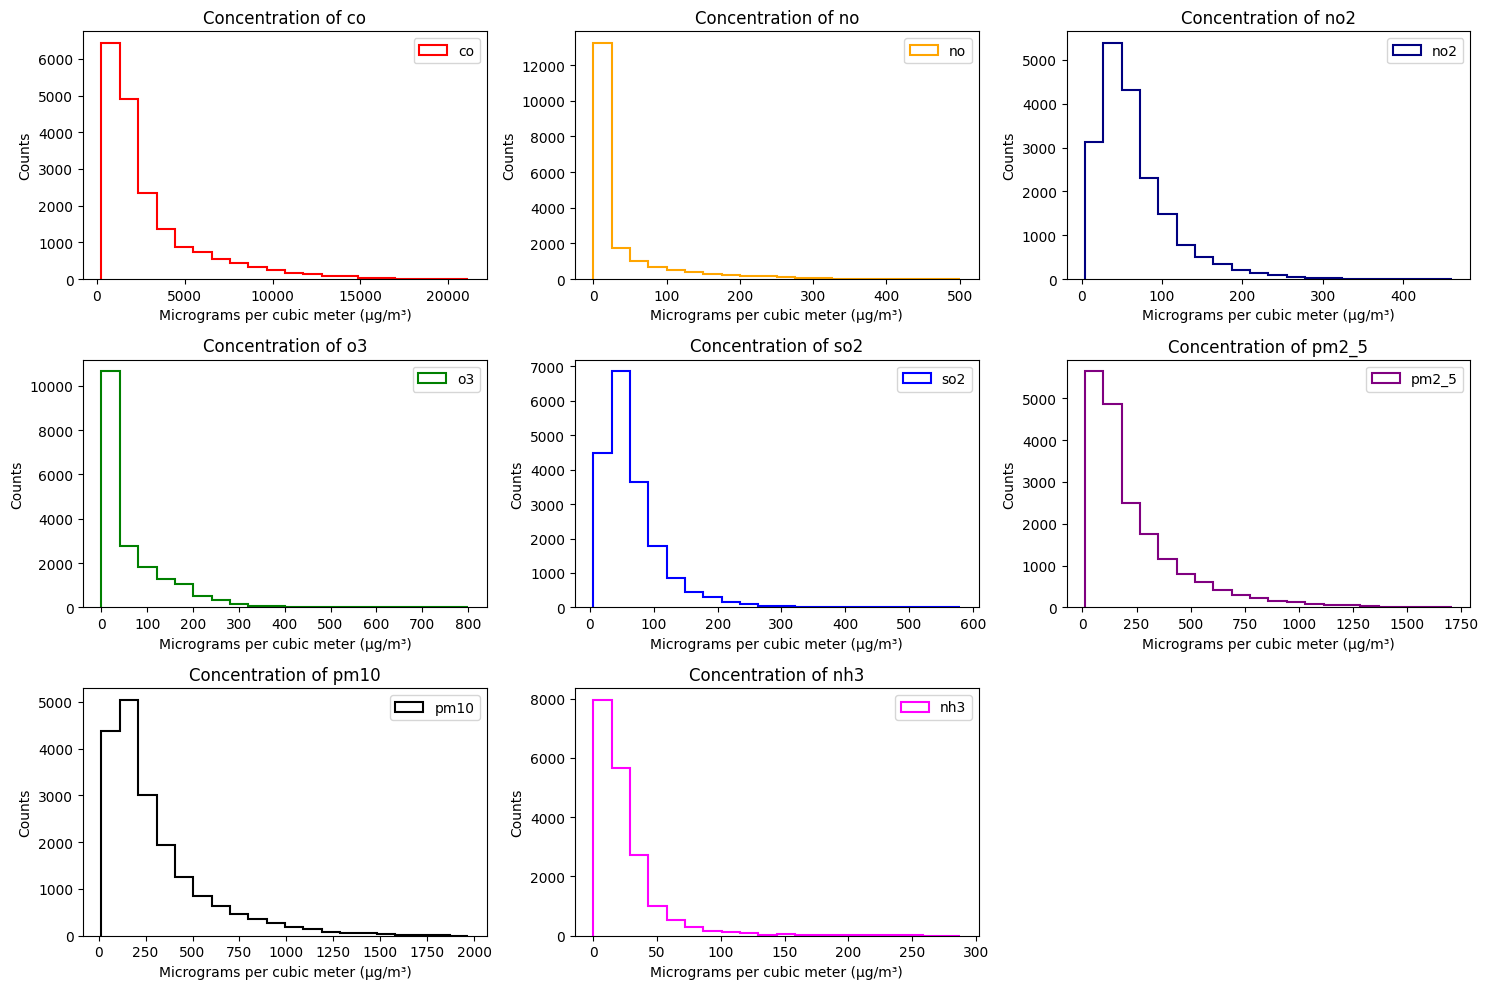

In [10]:
binsL = 20

colors = ["red", "orange", "navy", "green", "blue", "purple", "black", "magenta"] # different colors for different plots!
    
# Create a new figure and subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10)) # set the number of rows, columns and figure size
axes = axes.flatten() # Flatten the axes array for easy iteration

for i, air_metric in enumerate(df_no_time.columns):
    ax = axes[i]  # Select the current axis
    c = colors[i] # Assign the color
    ax.hist(df_no_time[air_metric], bins=binsL, label=air_metric, linewidth=1.5, color=c, linestyle='-', histtype='step')
    ax.legend()  # Add legend for each histogram
    ax.set_title('Concentration of {}'.format(air_metric))
    ax.set_xlabel('Micrograms per cubic meter (µg/m³)')
    ax.set_ylabel('Counts')

for i in range(len(df_no_time.columns), 9):  # Remove any extra subplots
    fig.delaxes(axes[i])

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()


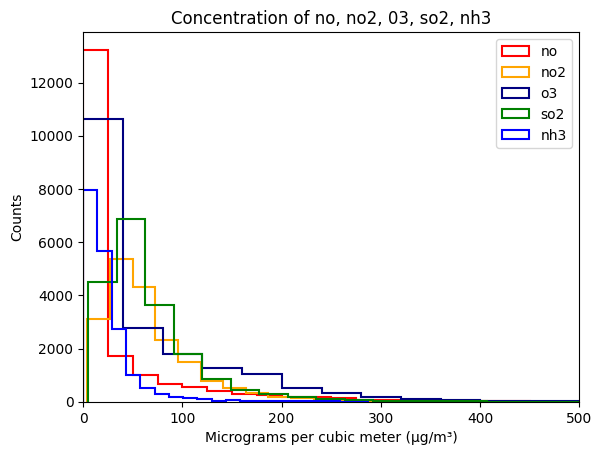

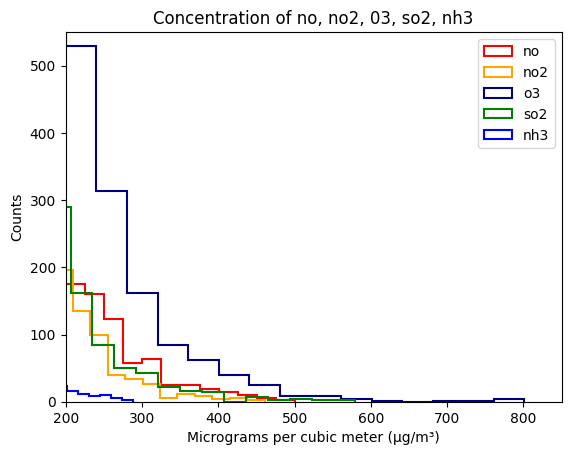

In [11]:
binsL = 20

colors = ["red", "orange", "navy", "green", "blue", "purple", "black", "magenta"] # different colors for different plots

pollutants = df[['no','no2','o3','so2','nh3']] # For further analysis, plot the pollutants which are in approximately the same range (no, no2, o3, so2, nh3)

plt.xlim(0, 500) # Set the limit for the x axis to see more details in the graph

for i, air_metric in enumerate(pollutants):
    plt.hist(df_no_time[air_metric], bins=binsL, label=air_metric, linewidth=1.5, color=colors[i], linestyle='-', histtype='step')
plt.xlabel('Micrograms per cubic meter (µg/m³)')
plt.ylabel('Counts')
plt.title('Concentration of no, no2, 03, so2, nh3')
plt.legend()
plt.show()

for i, air_metric in enumerate(pollutants):
    plt.hist(df_no_time[air_metric], bins=binsL, label=air_metric, linewidth=1.5, color=colors[i], linestyle='-', histtype='step')
plt.ylim(0,550)
plt.xlim(200, 850) # Set the limit for the x axis to see outliers region
plt.xlabel('Micrograms per cubic meter (µg/m³)')
plt.ylabel('Counts')
plt.title('Concentration of no, no2, 03, so2, nh3')
plt.legend()
plt.show()

<Axes: >

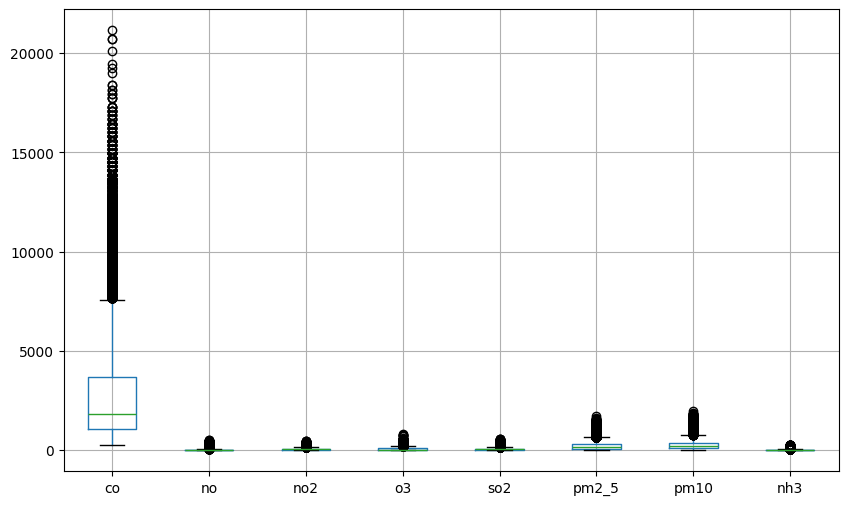

In [42]:
plt.figure(figsize=(10, 6))
df_no_time.boxplot()

<Axes: >

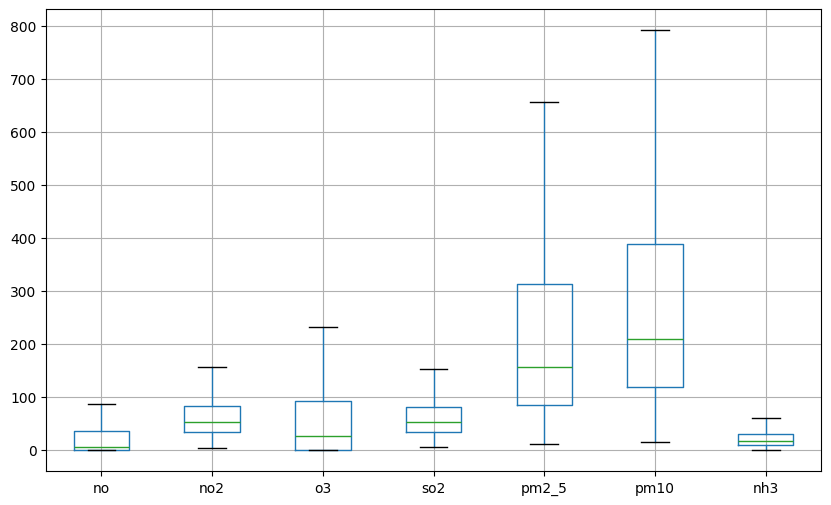

In [38]:
plt.figure(figsize=(10, 6))
df_no_time.drop('co', axis = 1).boxplot(showfliers=False)


<Axes: >

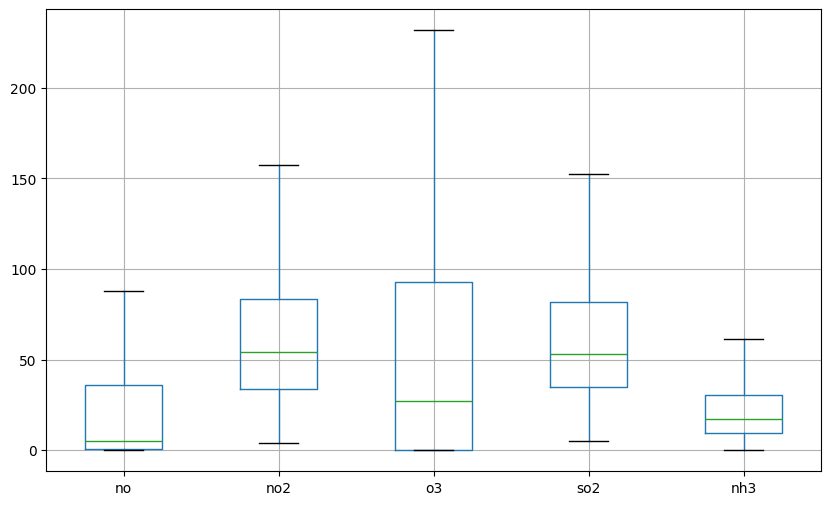

In [41]:
df_short = df[['no', 'no2', 'o3', 'so2', 'nh3']]
plt.figure(figsize=(10, 6))
df_short.boxplot(showfliers=False)

In [15]:
df_no_time.corr(numeric_only = True) # Correlation matrix

,co,no,no2,o3,so2,pm2_5,pm10,nh3
co,1.000000,0.914129,0.764201,-0.402284,0.534227,0.936830,0.950218,0.784951
no,0.914129,1.000000,0.557712,-0.354905,0.498719,0.816441,0.829910,0.724342
no2,0.764201,0.557712,1.000000,-0.343609,0.710371,0.701840,0.711998,0.718399
o3,-0.402284,-0.354905,-0.343609,1.000000,0.013204,-0.286661,-0.294825,-0.275983
so2,0.534227,0.498719,0.710371,0.013204,1.000000,0.488476,0.491889,0.628444
pm2_5,0.936830,0.816441,0.701840,-0.286661,0.488476,1.000000,0.989291,0.644446
pm10,0.950218,0.829910,0.711998,-0.294825,0.491889,0.989291,1.000000,0.686081
nh3,0.784951,0.724342,0.718399,-0.275983,0.628444,0.644446,0.686081,1.000000


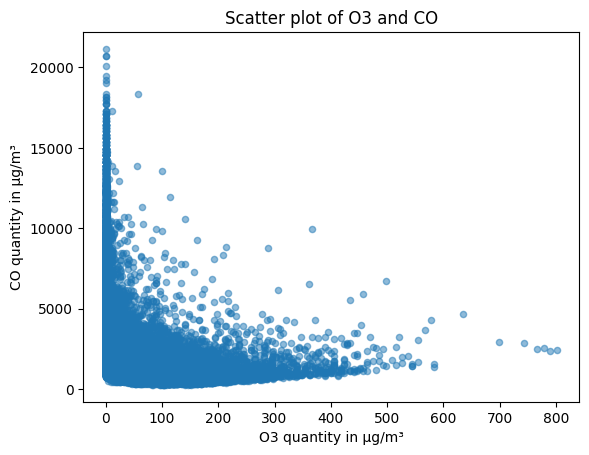

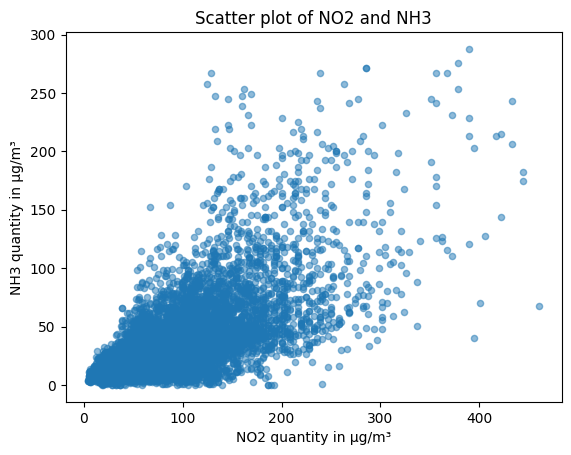

In [69]:
df.plot.scatter(x = 'o3', y = 'co', alpha = 0.5) # plot the scatter plot
plt.xlabel('O3 quantity in µg/m³')
plt.ylabel('CO quantity in µg/m³')
plt.title('Scatter plot of O3 and CO')
plt.show()

df.plot.scatter(x = 'no2', y = 'nh3', alpha = 0.5) # plot the scatter plot
plt.xlabel('NO2 quantity in µg/m³')
plt.ylabel('NH3 quantity in µg/m³')
plt.title('Scatter plot of NO2 and NH3')
plt.show()

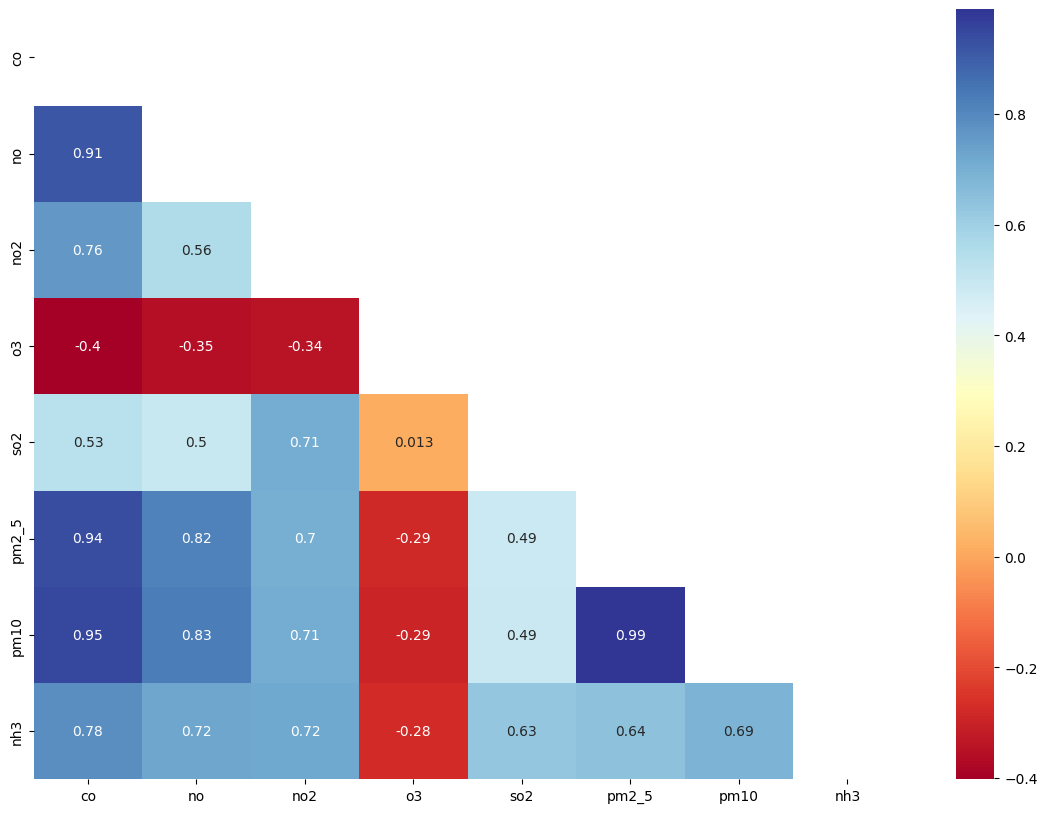

In [45]:
plt.figure(figsize = (14, 10))
mask = np.triu(np.ones_like(df_no_time.corr()))
sns.heatmap(df_no_time.corr(), cmap = 'RdYlBu', mask = mask, annot = True)
plt.show()

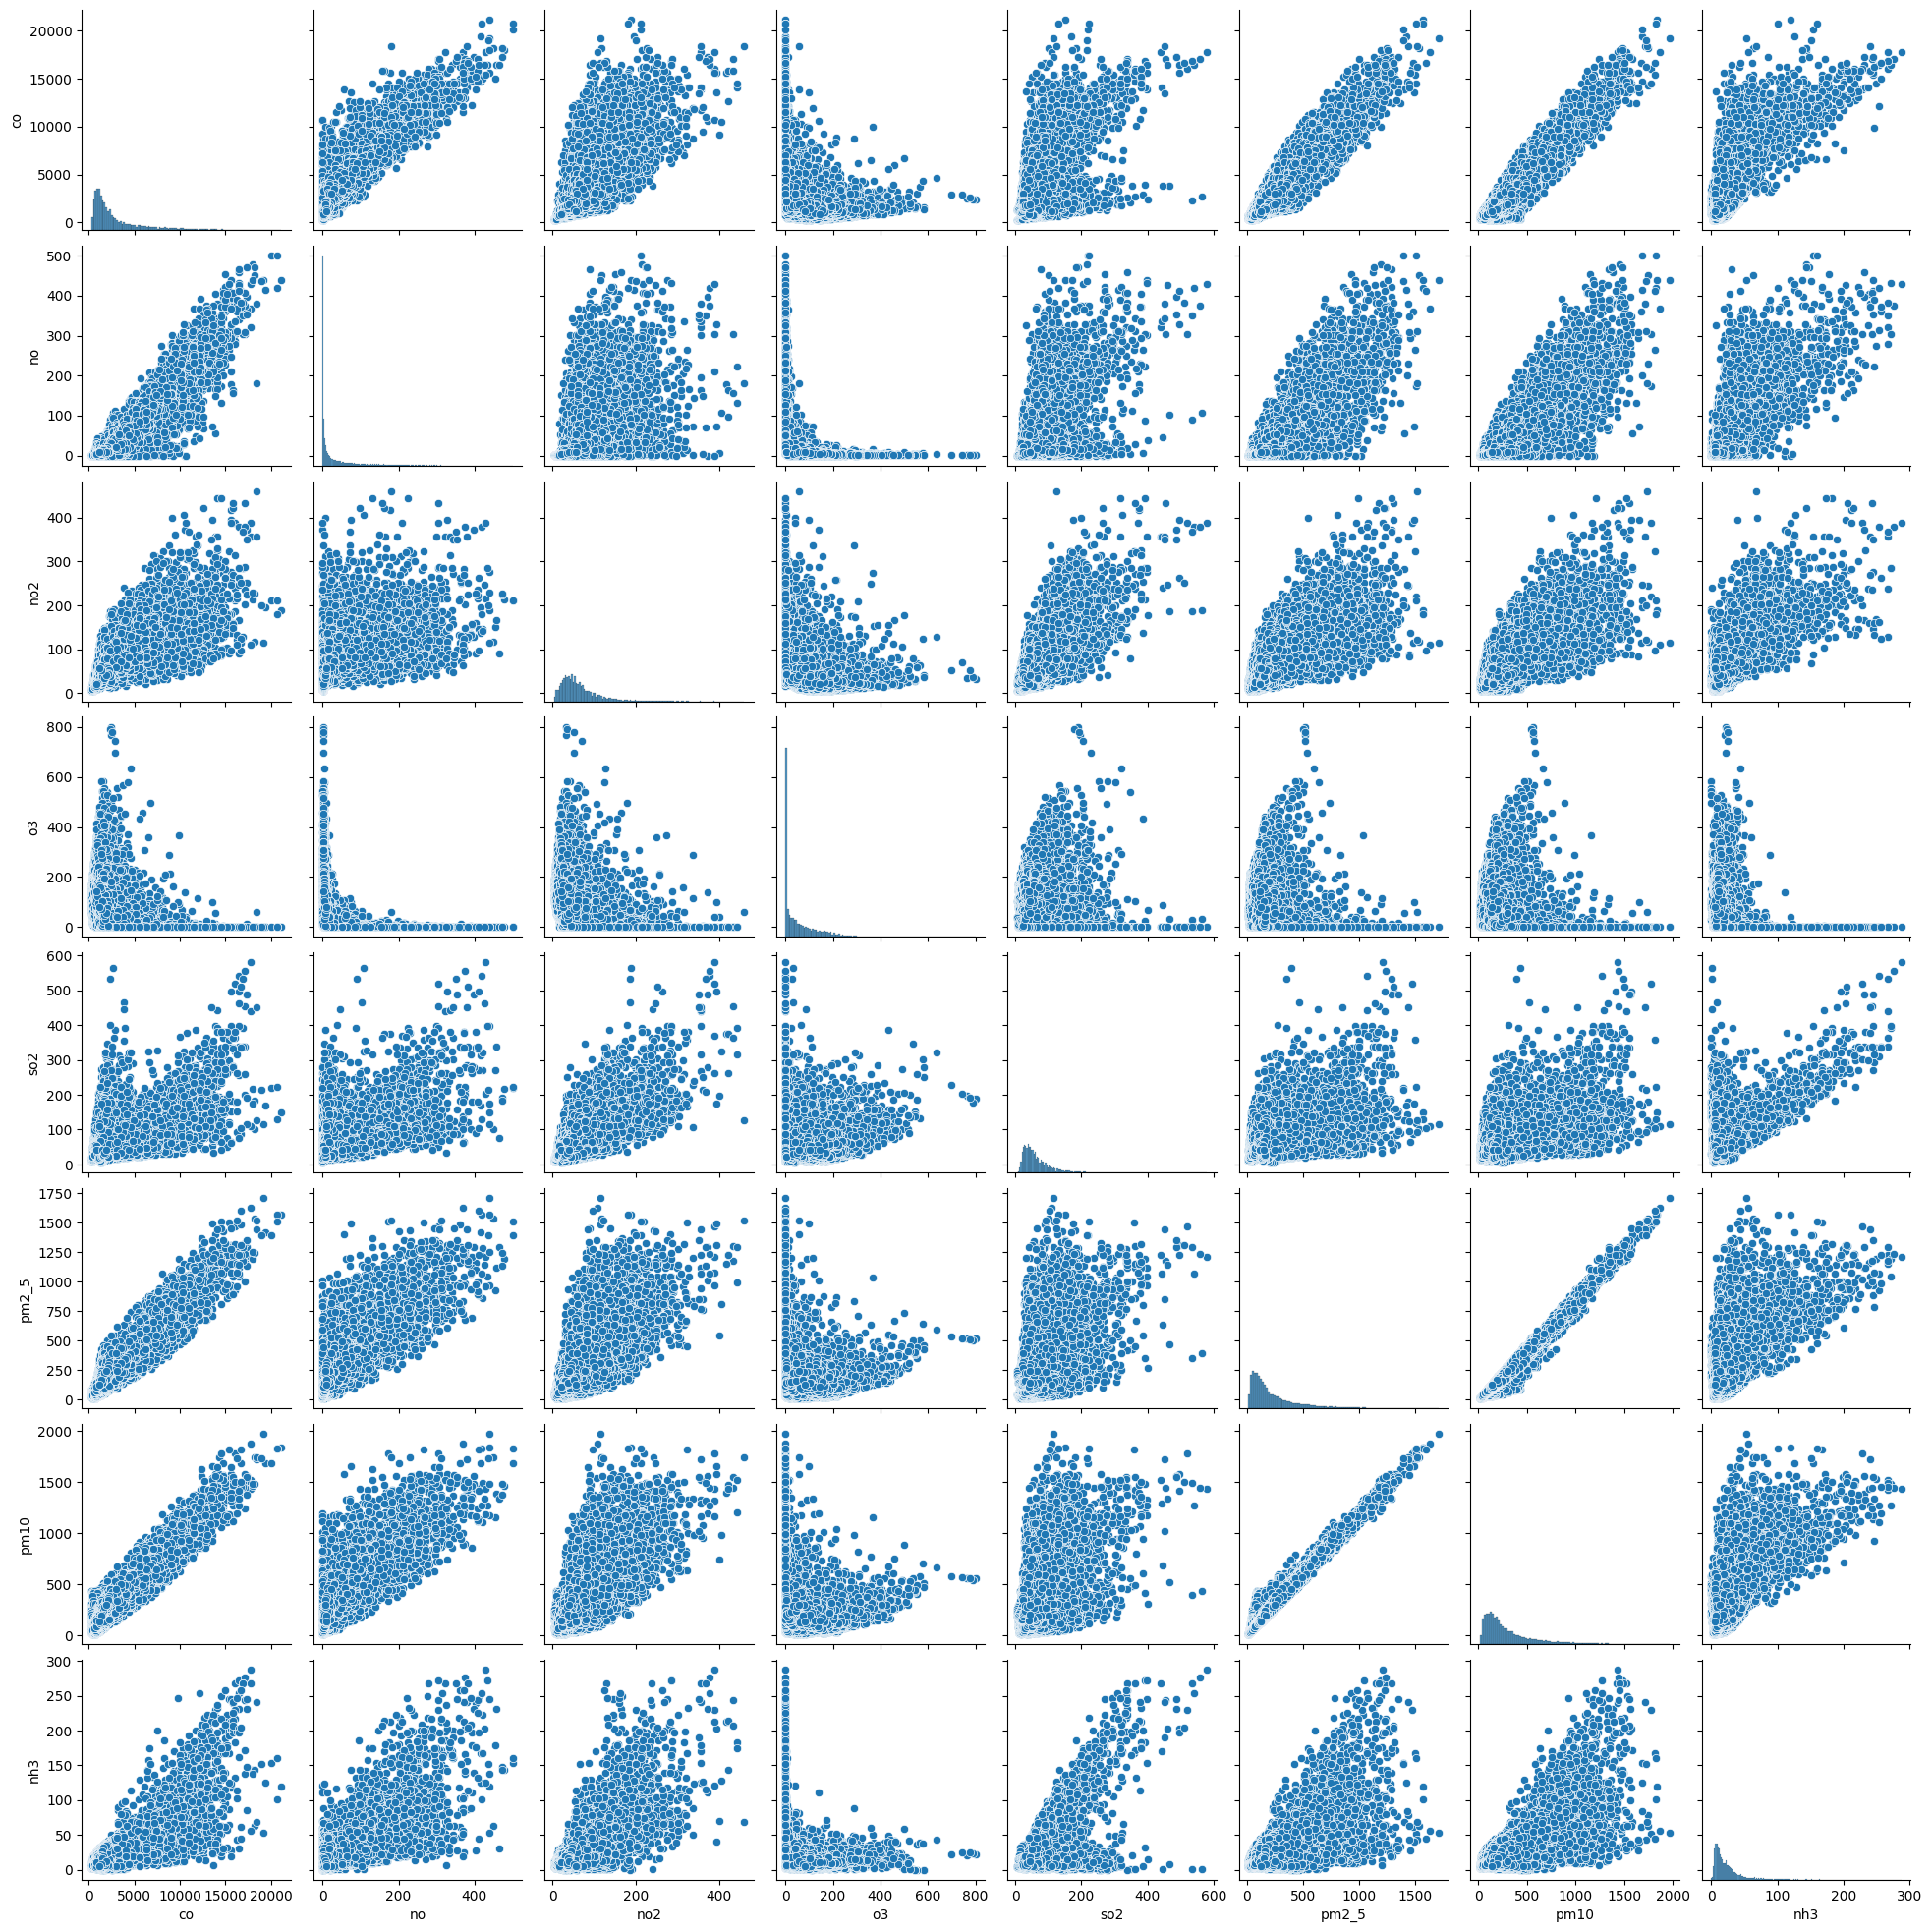

In [18]:
sns.pairplot(df_no_time)
plt.show()

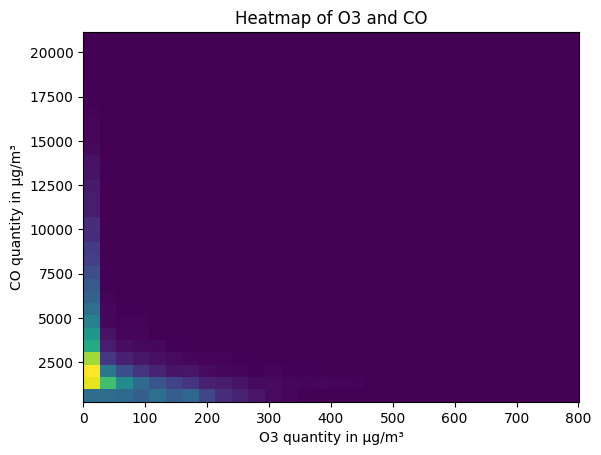

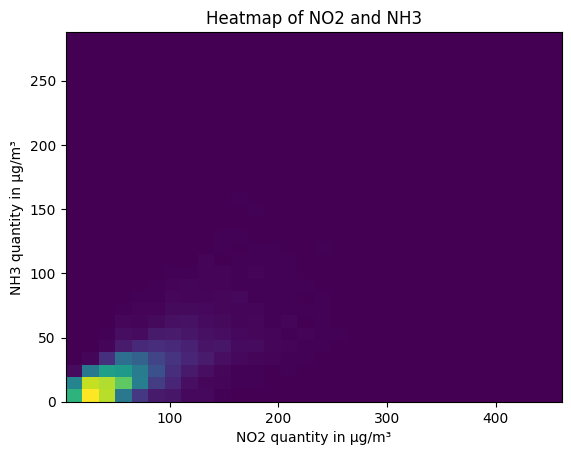

In [67]:
plt.hist2d(df['o3'], df['co'], bins = 30) # plot the heatmap
plt.xlabel('O3 quantity in µg/m³')
plt.ylabel('CO quantity in µg/m³')
plt.title('Heatmap of O3 and CO')
plt.show()

plt.hist2d(df['no2'], df['nh3'], bins = 30) # plot the heatmap
plt.xlabel('NO2 quantity in µg/m³')
plt.ylabel('NH3 quantity in µg/m³')
plt.title('Heatmap of NO2 and NH3')

plt.show()

# In this case, the scatter plots would visualize data better than the heatplots

In [71]:
mean_data = df_no_time.mean() # extract the mean, median, mode and standard deviation data
median_data = df_no_time.median()
mode_data = df_no_time.mode()
std_data =  df_no_time.std()
quantile_data = df_no_time.quantile(q = [0.25, 0.5, 0.75], axis = 0, numeric_only = True) # extract the quartile data
iqr_data = quantile_data.iloc[2] - quantile_data.iloc[0] # find the interquatile range by subtracting third quartile (75%) from the first quartile
df_val_table = pd.DataFrame(
    {
        'Mean': mean_data,
        'Median': median_data,
        'Mode': mode_data.iloc[0],
        'Standard Deviation': std_data,
        '1st Quartile (25%)': quantile_data.iloc[0],
        '2nd Quartile (50%)': quantile_data.iloc[1],
        '3rd Quartile (75%)': quantile_data.iloc[2],
        'Interquantile Range (IQR)': iqr_data
}      
)

# In this dataset there are 2 modes for the pm10 pollutant. 
# Extra line needed to add them to the table.
# Try printing mode_data to see details.
# print(mode_data)
df_val_table.iloc[6, 2] = str(mode_data.iloc[0, 6]) + ' / ' + str(mode_data.iloc[1, 6]) # Edit table so both mode values will be visible

df_val_table.transpose() #

# An easy alternative way would be just to append the IQR and other values to the produced by df.describe(), which was discovered after this code was written

/var/folders/hx/c878nf113fv7h9m8j458sdbh0000gn/T/ipykernel_1275/1906518108.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '117.93 / 176.21' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_val_table.iloc[6, 2] = str(mode_data.iloc[0, 6]) + ' / ' + str(mode_data.iloc[1, 6]) # Edit table so both mode values will be visible


,co,no,no2,o3,so2,pm2_5,pm10,nh3
Mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
Median,1842.5,5.25,54.15,27.18,52.93,157.445,209.705,17.48
Mode,1895.9,0.0,45.93,0.0,62.94,98.81,117.93 / 176.21,8.61
Standard Deviation,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
1st Quartile (25%),1068.12,0.68,33.93,0.34,34.81,84.44,118.7975,9.63
2nd Quartile (50%),1842.5,5.25,54.15,27.18,52.93,157.445,209.705,17.48
3rd Quartile (75%),3685.0,35.76,83.63,92.98,82.02,313.0,387.965,30.4
Interquantile Range (IQR),2616.88,35.08,49.7,92.64,47.21,228.56,269.1675,20.77


In [100]:
air_metric = 'pm10'

bootstrap_medians = []
bootstrap_stds = []
for nrepeat in range(1000): 
    sample = resample(df[air_metric]) # take random samples from the pm10 values list
    bootstrap_medians.append(sample.median()) # calculate the median of sample and append the list
    bootstrap_stds.append(sample.std()) 
bootstrap_medians = pd.DataFrame(bootstrap_medians)
bootstrap_stds = pd.DataFrame(bootstrap_stds)


print('Bootstrap Statistics median:')
print(f'original: {df[air_metric].median()}')
print(f'bias: {bootstrap_medians.median() - df[air_metric].median()}') # calculate difference between the sample mean and the original mean
print(f'std. error: {bootstrap_medians.std()}')

Bootstrap Statistics median:
original: 209.70499999999998
bias: 0   -0.035
dtype: float64
std. error: 0    1.585272
dtype: float64


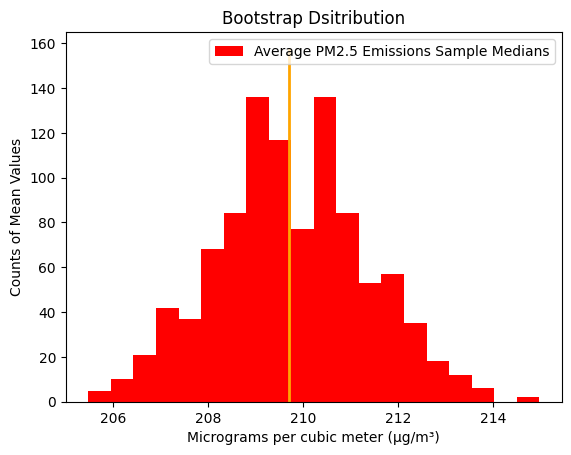

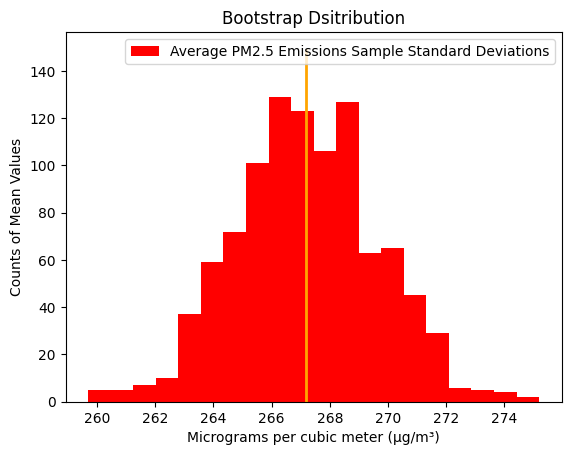

In [103]:
## plot the generated bootstrap distribution directly from the results
plt.hist(bootstrap_medians, bins=20, label="Average PM2.5 Emissions Sample Medians", linewidth=1.5, color = 'red')
maxy = plt.gca().get_ylim()[1]*1.10 # calculate the maximum y value and increase it by 10% for the visualization purposes
plt.plot([df[air_metric].median(), df[air_metric].median()], [0.,maxy], color="orange", lw=2)
plt.xlabel('Micrograms per cubic meter (µg/m³)')
plt.ylabel('Counts of Mean Values')
plt.title('Bootstrap Dsitribution')
plt.legend()
plt.show()

plt.hist(bootstrap_stds, bins=20, label="Average PM2.5 Emissions Sample Standard Deviations", linewidth=1.5, color = 'red')
maxy = plt.gca().get_ylim()[1]*1.10 # calculate the maximum y value and increase it by 10% for the visualization purposes
plt.plot([df[air_metric].std(), df[air_metric].std()], [0.,maxy], color="orange", lw=2)
plt.xlabel('Micrograms per cubic meter (µg/m³)')
plt.ylabel('Counts of Mean Values')
plt.title('Bootstrap Dsitribution')
plt.legend()
plt.show()

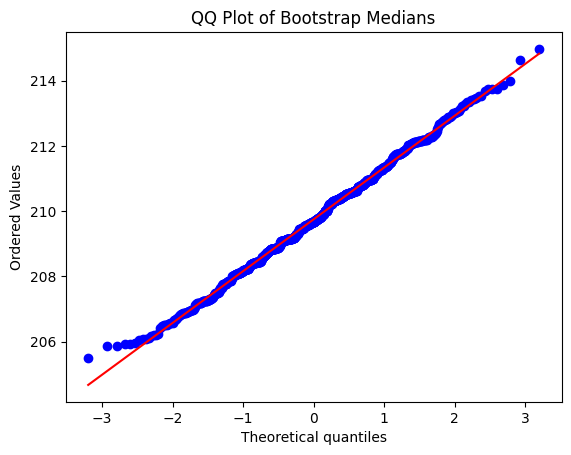

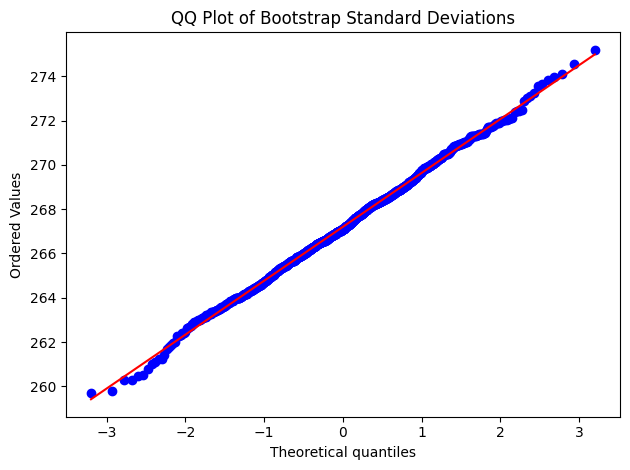

In [127]:
# QQ Plots
stats.probplot(bootstrap_medians[0], dist="norm", plot=plt)
plt.title('QQ Plot of Bootstrap Medians')
plt.show()

stats.probplot(bootstrap_stds[0], dist="norm", plot=plt)
plt.title('QQ Plot of Bootstrap Standard Deviations')

plt.tight_layout()
plt.show()


In [108]:
# Print median confidence intervals for pm2.5
ci_68_medians = np.percentile(bootstrap_medians, [16, 84])
ci_95_medians = np.percentile(bootstrap_medians, [2.5, 97.5])

print(f'Confidence intervals at 68% for medians: {ci_68_medians[0]:.3f} - {ci_68_medians[1]:.3f}')
print(f'Confidence intervals at 95% for medians: {ci_95_medians[0]:.3f} - {ci_95_medians[1]:.3f}')

print('----------------------------------------------------------------------')

# Print median confidence intervals for standard deviations
ci_68_stds = np.percentile(bootstrap_stds, [16, 84])
ci_95_stds = np.percentile(bootstrap_stds, [2.5, 97.5])

print(f'Confidence intervals at 68% for standard deviations: {ci_68_stds[0]:.3f} - {ci_68_stds[1]:.3f}')
print(f'Confidence intervals at 95% for standard deviations: {ci_95_stds[0]:.3f} - {ci_95_stds[1]:.3f}')


Confidence intervals at 68% for medians: 208.189 - 211.331
Confidence intervals at 95% for medians: 206.679 - 212.920
----------------------------------------------------------------------
Confidence intervals at 68% for standard deviations: 264.737 - 269.697
Confidence intervals at 95% for standard deviations: 262.694 - 271.868


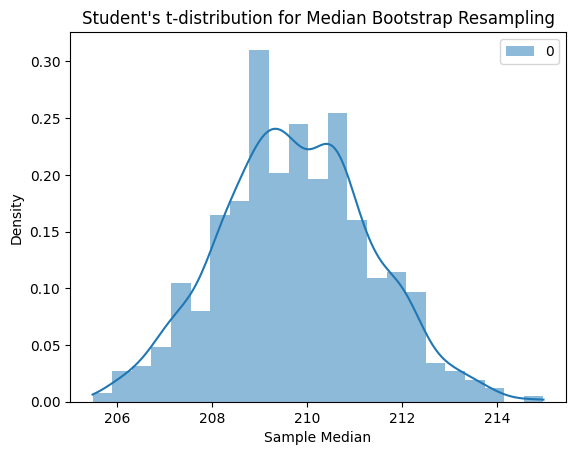

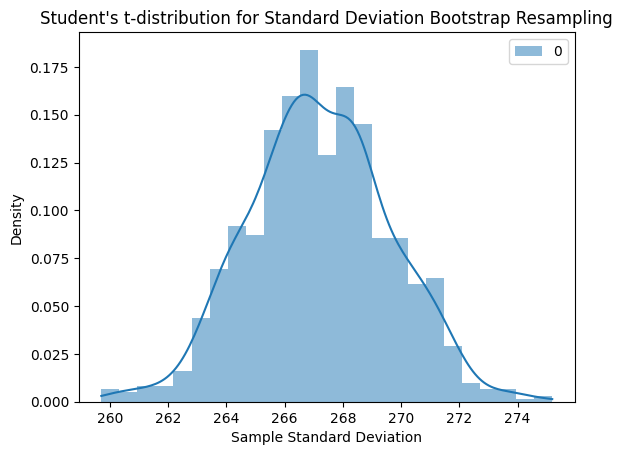

In [110]:
sns.histplot(bootstrap_medians, kde=True, stat="density", linewidth=0)
plt.title("Student's t-distribution for Median Bootstrap Resampling")
plt.xlabel("Sample Median")
plt.ylabel("Density")
plt.show()

sns.histplot(bootstrap_stds, kde=True, stat="density", linewidth=0)
plt.title("Student's t-distribution for Standard Deviation Bootstrap Resampling")
plt.xlabel("Sample Standard Deviation")
plt.ylabel("Density")
plt.show()

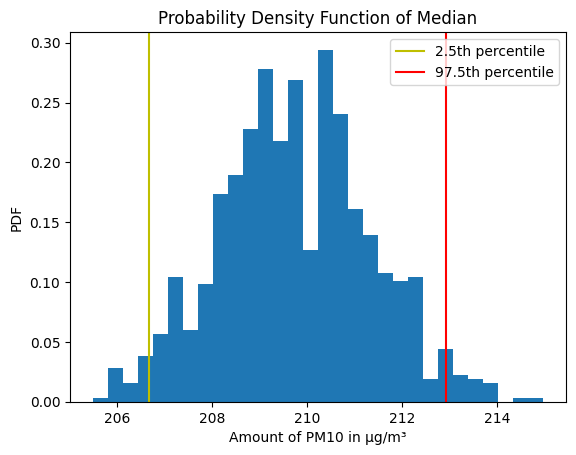

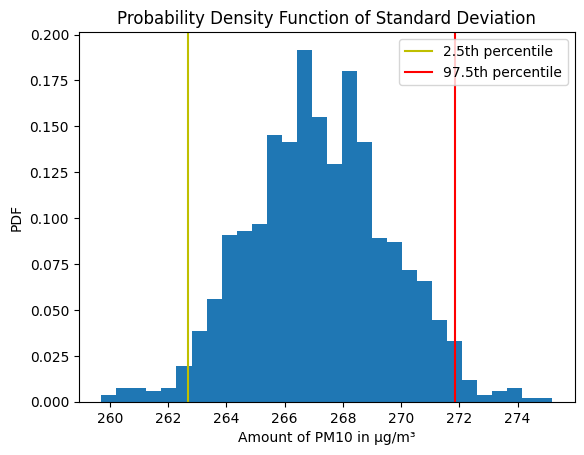

In [130]:
plt.hist(bootstrap_medians, bins=30, density=True) # plot the normalised distribution which corresponds to the Probability Density Function (PDF)

## while plotting this I can also calculate the percentile position so that we calculate the 95% confidence interval
## Confidence Interval: It is the range in which the values are likely to exist in the population.
## It is estimated from the original sample and usually defined as 95% confidence.
## The lower and upper limits of confidence interval defined by the values corresponding
## to the first and last 2.5th percentiles.

plt.axvline(x=np.percentile(bootstrap_medians,[2.5]), ymin=0, ymax=1,label='2.5th percentile',c='y')
plt.axvline(x=np.percentile(bootstrap_medians,[97.5]), ymin=0, ymax=1,label='97.5th percentile',c='r')
plt.xlabel("Amount of PM10 in µg/m³")
plt.ylabel("PDF")
plt.title("Probability Density Function of Median")
plt.legend()
plt.show()

plt.hist(bootstrap_stds, bins=30, density=True) # plot the normalised distribution which corresponds to the Probability Density Function (PDF)

## while plotting this I can also calculate the percentile position so that we calculate the 95% confidence interval
## Confidence Interval: It is the range in which the values are likely to exist in the population.
## It is estimated from the original sample and usually defined as 95% confidence.
## The lower and upper limits of confidence interval defined by the values corresponding
## to the first and last 2.5th percentiles.

plt.axvline(x=np.percentile(bootstrap_stds,[2.5]), ymin=0, ymax=1,label='2.5th percentile',c='y')
plt.axvline(x=np.percentile(bootstrap_stds,[97.5]), ymin=0, ymax=1,label='97.5th percentile',c='r')
plt.xlabel("Amount of PM10 in µg/m³")
plt.ylabel("PDF")
plt.title("Probability Density Function of Standard Deviation")
plt.legend()
plt.show()